In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# Introduction

In this project, by using data mining and machine learning methods, we tried to design a system to predict diabetes.
In the aforementioned dataset, we have used the indicators Gender, Age, Race, Education, Marital Status,Occupation, Weight ,Height ,BMI ,Systolic blood pressure, Diastolic blood pressure, Direct cholesterol, Total cholesterol and Physical activity to learn our model.


Dataset from : https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey

# Starting (Getting data &  Normalization‌)

First, we call the libraries we need.
We use pandas, numpy, sklearn, matplotlib and seborn libraries.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import copy


Some warnings cause clutter in our environment that we ignore them.

In [4]:
import warnings
warnings.filterwarnings('ignore')

Then we read our data with pandas structure.

In [5]:
dataset1 = pd.read_csv('NHANES.csv')
#dataset1 = pd.read_csv('/content/drive/MyDrive/2023/NHANES.csv')



One of the ways to reduce the data dimensions and clean the data is to remove the columns that we do not need:

**Data cleaning and dimensionality reduction**

In [6]:

#Here, because we have little processing power, we had to delete some data.
dataset2=dataset1.drop(dataset1.index[4594:10001])
#dataset2=dataset1.sample(n = 100)

#Here, we are going to delete the columns that we don't need.
dataset3=dataset2[["Gender",'Age','Race1','Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive','Diabetes']]

#Now we set the main dataset equal to the values we want.
dataset=copy.deepcopy(dataset3)

dataset.head()

Gender  Age  Race1     Education MaritalStatus        Work  Weight  Height  \
0    male   34  White   High School       Married  NotWorking    87.4   164.7   
1    male   34  White   High School       Married  NotWorking    87.4   164.7   
2    male   34  White   High School       Married  NotWorking    87.4   164.7   
3    male    4  Other           NaN           NaN         NaN    17.0   105.4   
4  female   49  White  Some College   LivePartner  NotWorking    86.7   168.4   

     BMI  BPSysAve  BPDiaAve  DirectChol  TotChol PhysActive Diabetes  
0  32.22     113.0      85.0        1.29     3.49         No       No  
1  32.22     113.0      85.0        1.29     3.49         No       No  
2  32.22     113.0      85.0        1.29     3.49         No       No  
3  15.30       NaN       NaN         NaN      NaN        NaN       No  
4  30.57     112.0      75.0        1.16     6.70         No       No

In [7]:
# Data Dimensions
dataset.shape

(4594, 15)

**Check the data structure**

In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         4594 non-null   object 
 1   Age            4594 non-null   int64  
 2   Race1          4594 non-null   object 
 3   Education      3338 non-null   object 
 4   MaritalStatus  3347 non-null   object 
 5   Work           3615 non-null   object 
 6   Weight         4554 non-null   float64
 7   Height         4414 non-null   float64
 8   BMI            4408 non-null   float64
 9   BPSysAve       3922 non-null   float64
 10  BPDiaAve       3922 non-null   float64
 11  DirectChol     3899 non-null   float64
 12  TotChol        3899 non-null   float64
 13  PhysActive     3831 non-null   object 
 14  Diabetes       4520 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 538.5+ KB


Here we see that some of our records have undefined values. We have different ways to standardize here. As a solution, we can completely remove those rows so that the data we want to use for various purposes is standardized Or we can replace them with mean or median.

We give a brief overview of the structure of our data set:

In [9]:
dataset.isnull().sum()

Gender              0
Age                 0
Race1               0
Education        1256
MaritalStatus    1247
Work              979
Weight             40
Height            180
BMI               186
BPSysAve          672
BPDiaAve          672
DirectChol        695
TotChol           695
PhysActive        763
Diabetes           74
dtype: int64

In [10]:
dataset.describe().T

count        mean        std    min       25%      50%     75%  \
Age         4594.0   36.760340  22.238015   0.00   18.0000   36.000   54.00   
Weight      4554.0   71.691787  29.598767   2.80   56.6000   73.200   89.70   
Height      4414.0  162.266244  19.897473  83.60  157.1000  166.500  175.10   
BMI         4408.0   26.911010   7.491801  12.88   21.6875   26.195   31.21   
BPSysAve    3922.0  117.696073  17.129625  76.00  106.0000  115.000  127.00   
BPDiaAve    3922.0   66.658848  14.227947   0.00   60.0000   68.000   75.00   
DirectChol  3899.0    1.365499   0.419360   0.39    1.0600    1.290    1.60   
TotChol     3899.0    4.918818   1.066056   2.17    4.1100    4.810    5.56   

               max  
Age          80.00  
Weight      230.70  
Height      199.60  
BMI          81.25  
BPSysAve    226.00  
BPDiaAve    116.00  
DirectChol    3.72  
TotChol       9.34

According to what I had read, in this model of projects, deleting data is one of the worst things. Then I use the average value.

Of course, we should know that NaN values in the Diabetes column are not useful for us. Because this is our dependent variable. So we delete the rows in which diabetes has no value.

**Replace undefined values**

In [11]:
dataset_new=dataset
dataset_new = dataset_new.dropna(subset=['Diabetes'])



We also consider that our data has zero values in some columns, which we consider as undefined.

In [12]:
dataset_new[['Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive']] = dataset_new[['Education','MaritalStatus','Work','Weight','Height','BMI','BPSysAve','BPDiaAve','DirectChol','TotChol','PhysActive']].replace(0, np.NaN) 

#Now we count undefined values again
dataset_new.isnull().sum()

Gender              0
Age                 0
Race1               0
Education        1184
MaritalStatus    1175
Work              907
Weight             40
Height            108
BMI               114
BPSysAve          600
BPDiaAve          630
DirectChol        623
TotChol           623
PhysActive        691
Diabetes            0
dtype: int64

Now we replace other columns with undefined values with the average values of those columns.

In [13]:
dataset_new["Weight"].fillna(dataset_new["Weight"].mean(), inplace = True)
dataset_new["Height"].fillna(dataset_new["Height"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)
dataset_new["BPSysAve"].fillna(dataset_new["BPSysAve"].mean(), inplace = True)
dataset_new["BPDiaAve"].fillna(dataset_new["BPDiaAve"].mean(), inplace = True)
dataset_new["DirectChol"].fillna(dataset_new["DirectChol"].mean(), inplace = True)
dataset_new["TotChol"].fillna(dataset_new["TotChol"].mean(), inplace = True)

dataset_new.isnull().sum()

Gender              0
Age                 0
Race1               0
Education        1184
MaritalStatus    1175
Work              907
Weight              0
Height              0
BMI                 0
BPSysAve            0
BPDiaAve            0
DirectChol          0
TotChol             0
PhysActive        691
Diabetes            0
dtype: int64

We also use their mode for discrete values.

In [14]:
dataset_new["PhysActive"].fillna(dataset_new["PhysActive"].mode()[0], inplace = True)
dataset_new["Education"].fillna(dataset_new["Education"].mode()[0], inplace = True)
dataset_new["MaritalStatus"].fillna(dataset_new["MaritalStatus"].mode()[0], inplace = True)
dataset_new["Work"].fillna(dataset_new["Work"].mode()[0], inplace = True)


dataset_new.isnull().sum()

Gender           0
Age              0
Race1            0
Education        0
MaritalStatus    0
Work             0
Weight           0
Height           0
BMI              0
BPSysAve         0
BPDiaAve         0
DirectChol       0
TotChol          0
PhysActive       0
Diabetes         0
dtype: int64

In [15]:
dataset=copy.deepcopy(dataset_new)

We have done the data cleaning step successfully.

# Data Visualization

In this section, we want to illustrate our data for a more detailed examination. We use Matplotlib and Seaborn libraries for this.
Here we ask some questions and find the answer with different diagrams.

What is the difference between the race of people who are diabetes positive and those who are diabetes negative?

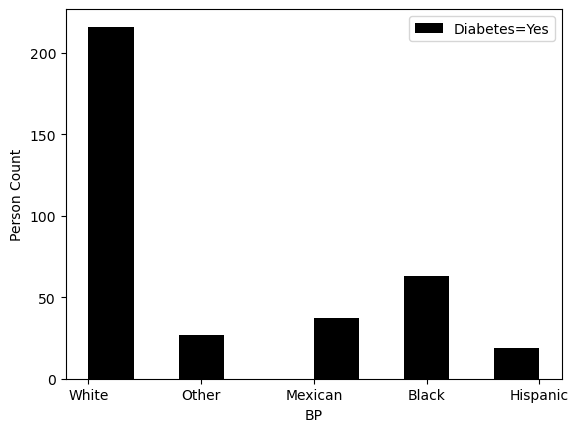

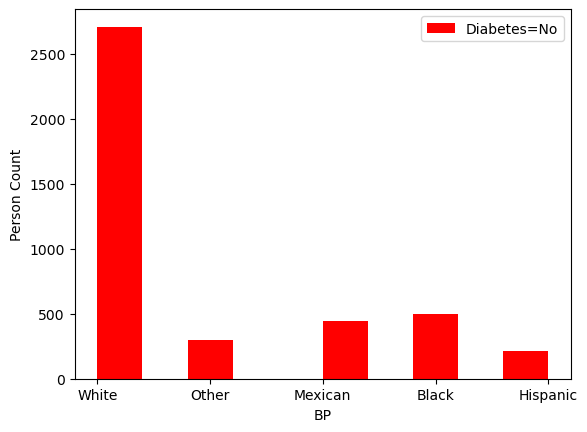

In [16]:
import matplotlib.pyplot as plt

YesDia = dataset_new['Diabetes'].values == 'Yes'
NoDia = dataset_new['Diabetes'].values == 'No'
YesDia=dataset_new[YesDia]
NoDia=dataset_new[NoDia]
 
Race1 = YesDia['Race1'].tolist()
Race0 = NoDia['Race1'].tolist()

plt.hist([Race1], color=[
         'Black'], label=['Diabetes=Yes'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

plt.hist([Race0], color=[
         'Red'], label=['Diabetes=No'])
plt.xlabel('BP')
plt.ylabel('Person Count')
plt.legend()
plt.show()

Do most diabetics have little physical activity?

<Axes: xlabel='PhysActive', ylabel='count'>

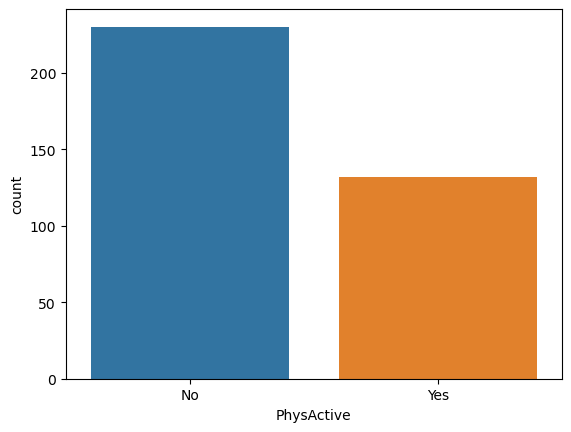

In [17]:
sns.countplot(x = 'PhysActive',data = YesDia)


<Axes: xlabel='PhysActive', ylabel='count'>

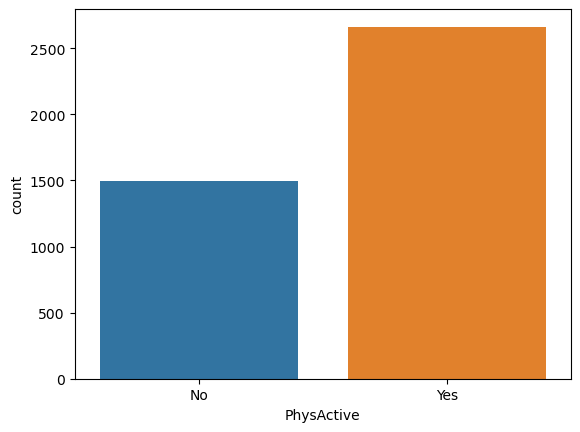

In [18]:
sns.countplot(x = 'PhysActive',data = NoDia)

**Lineplot**

<Axes: xlabel='Age', ylabel='Diabetes'>

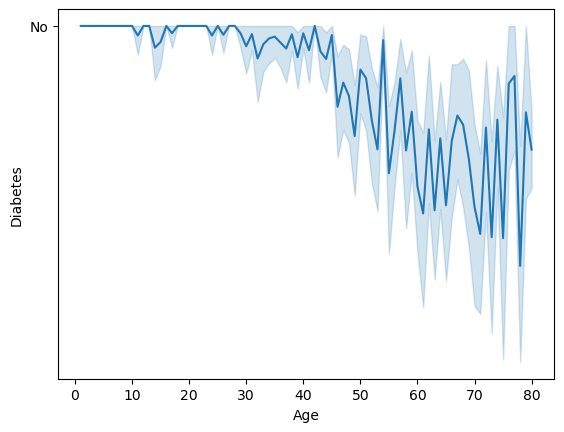

In [19]:
sns.lineplot(x="Age", y="Diabetes", data=dataset_new)

**Scatter matrix**

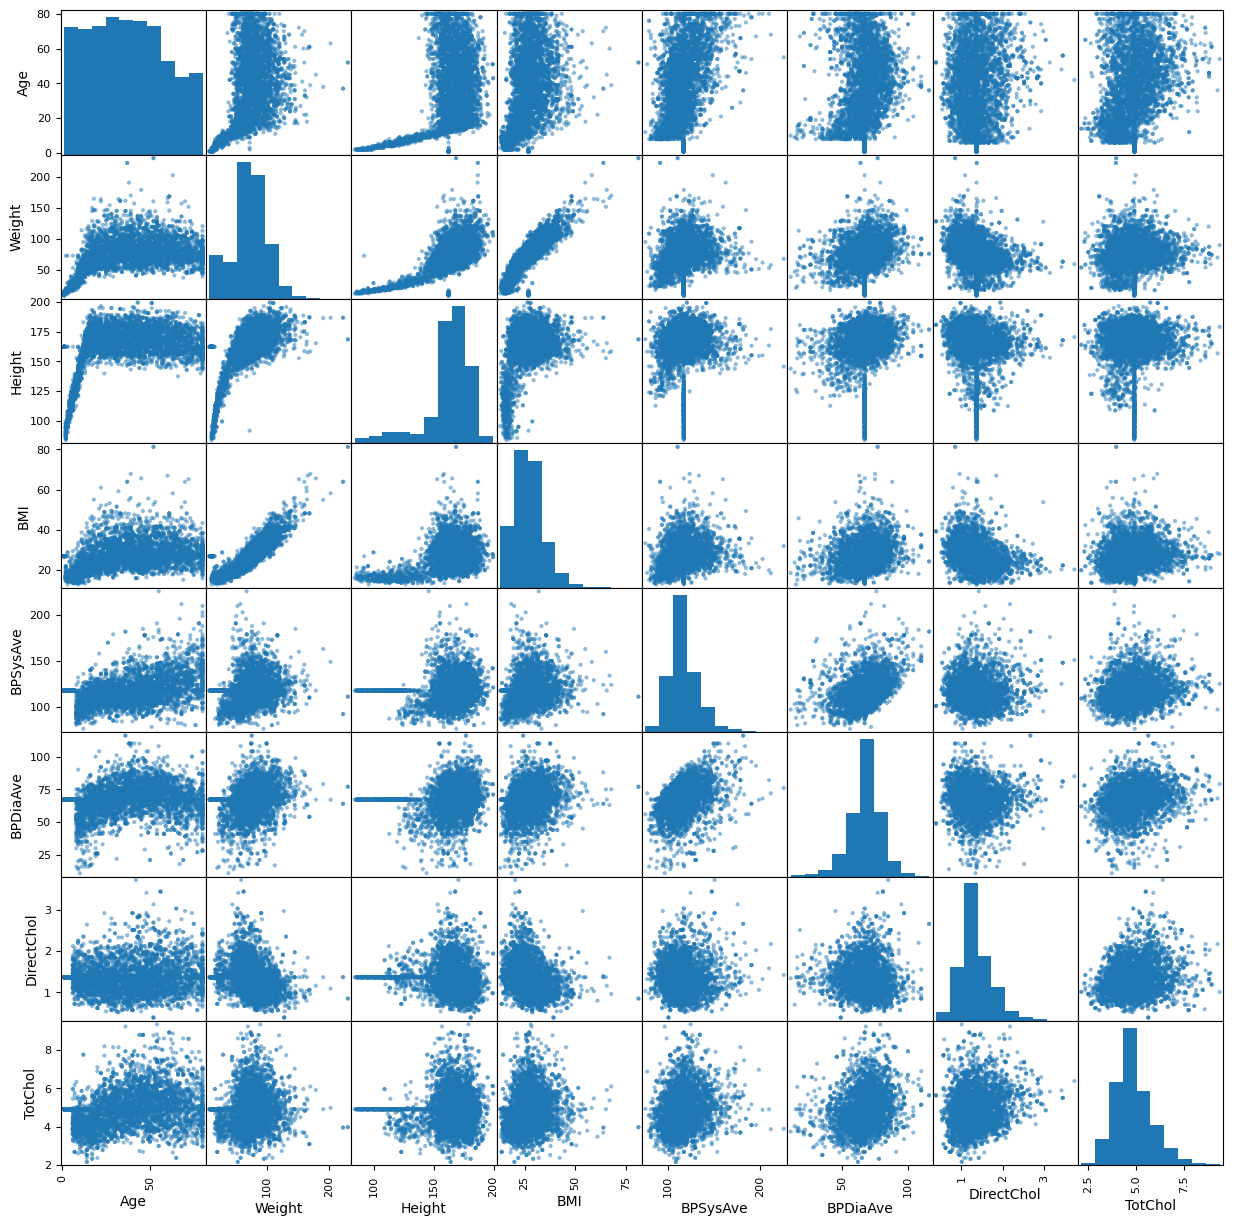

In [20]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(dataset , figsize=(15, 15))
plt.show()

**Distribution plots**

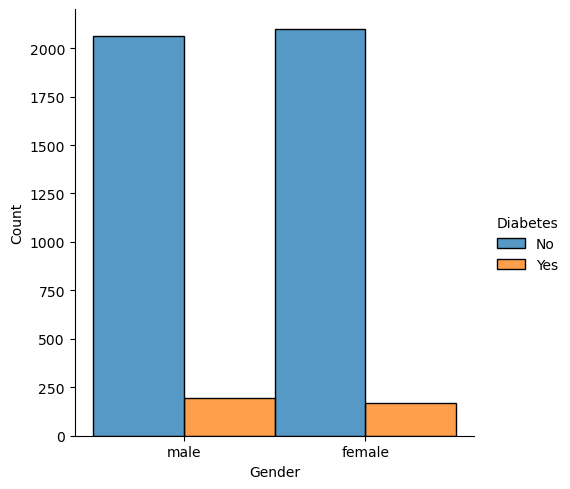

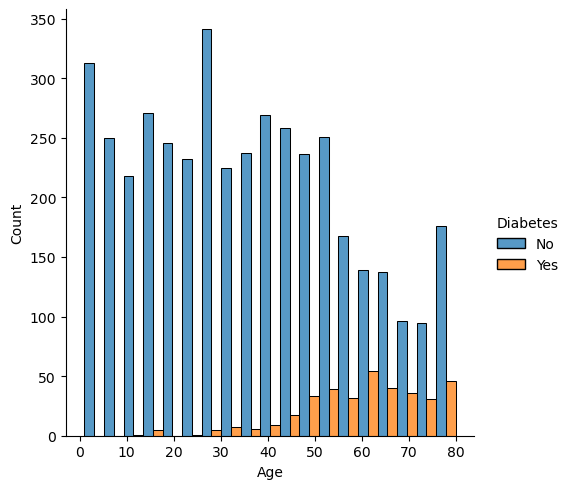

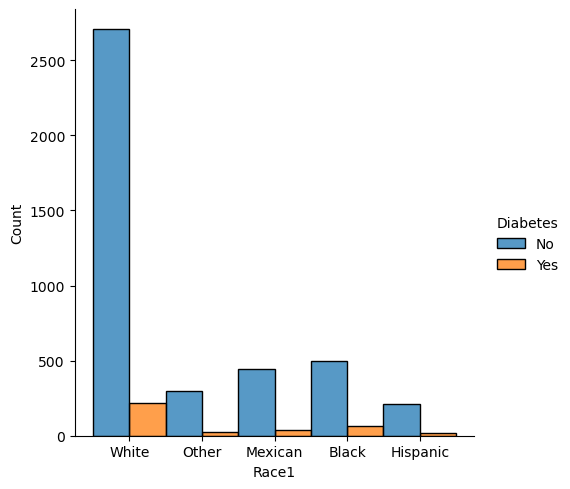

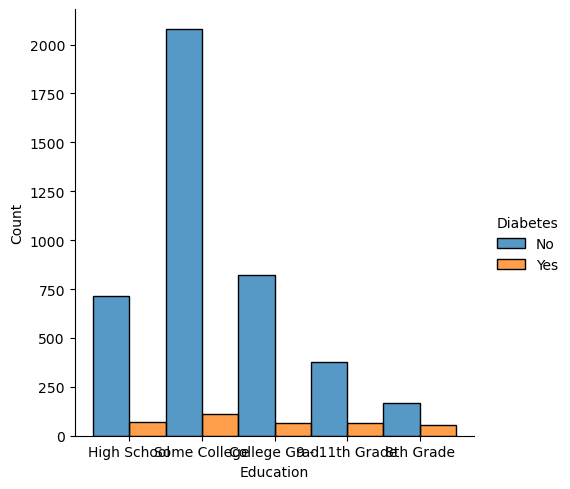

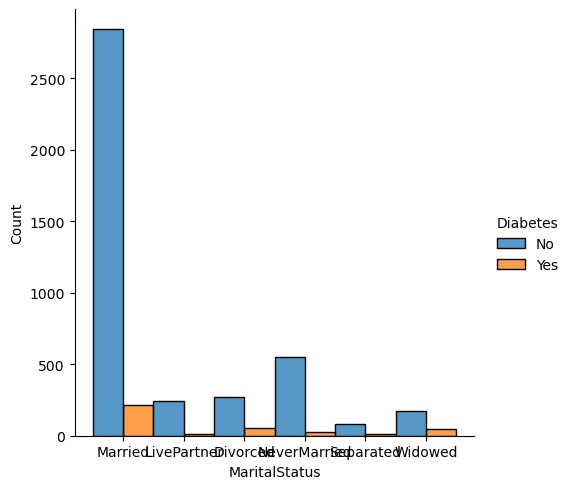

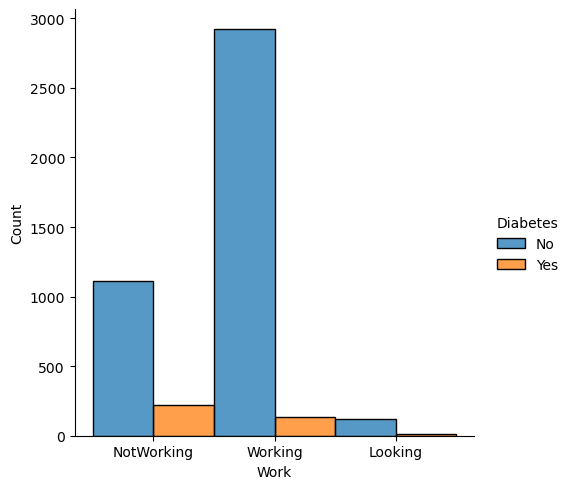

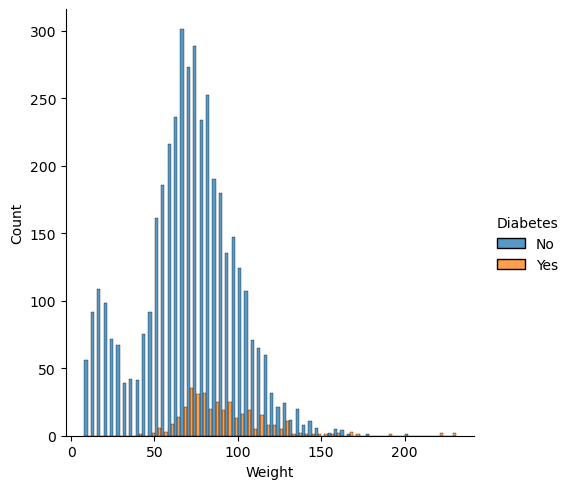

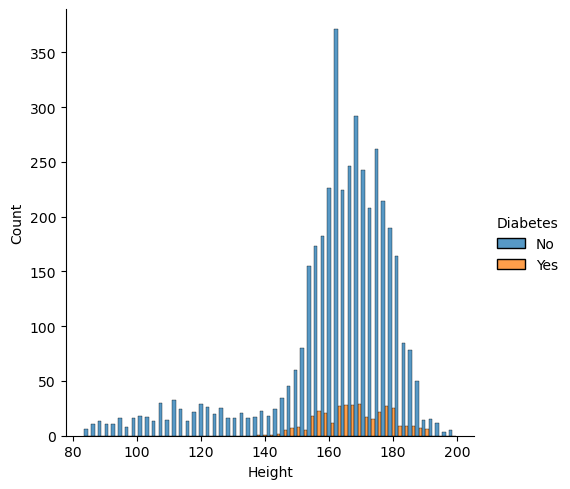

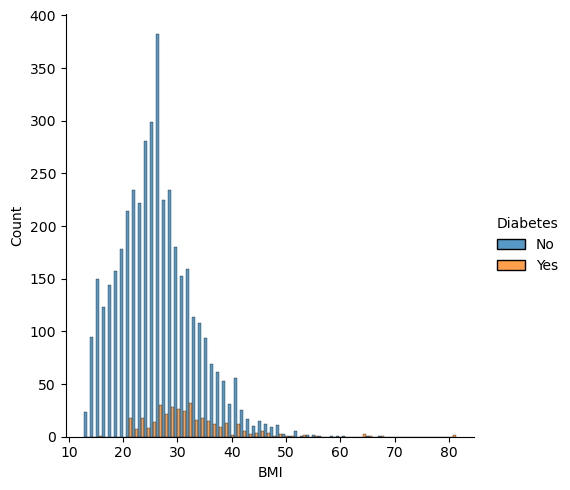

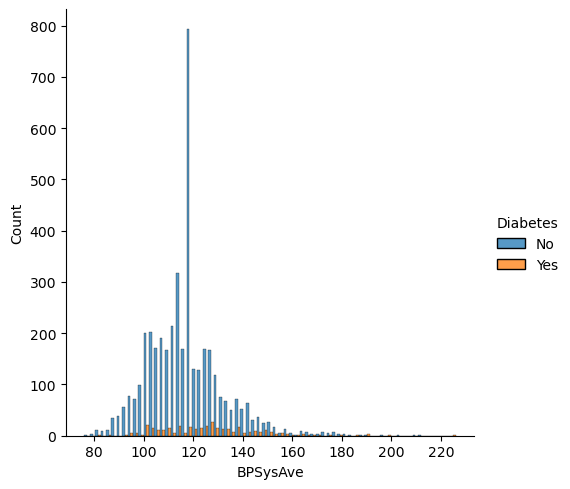

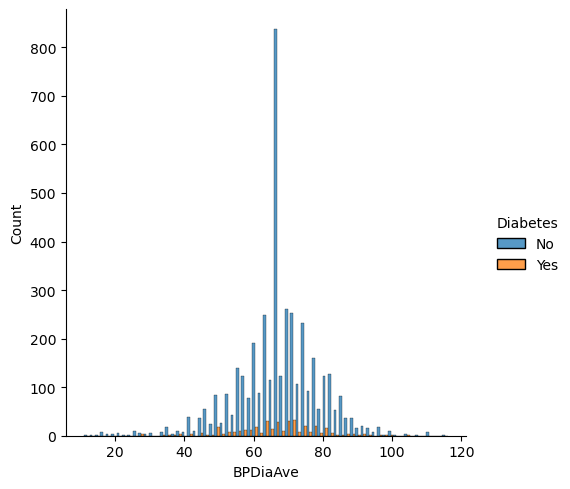

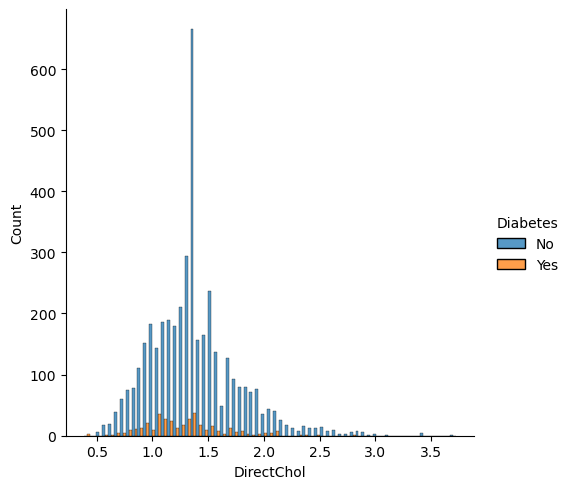

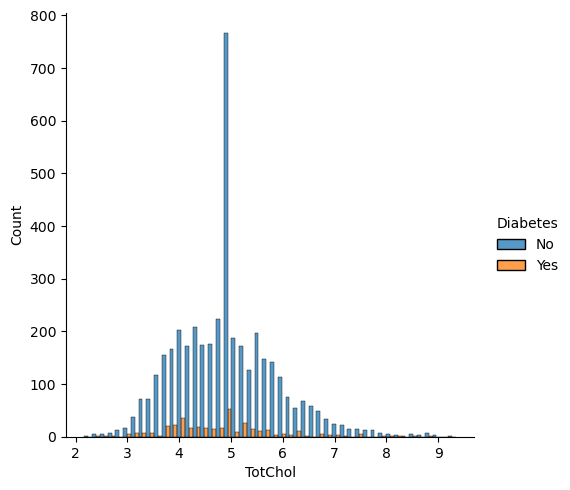

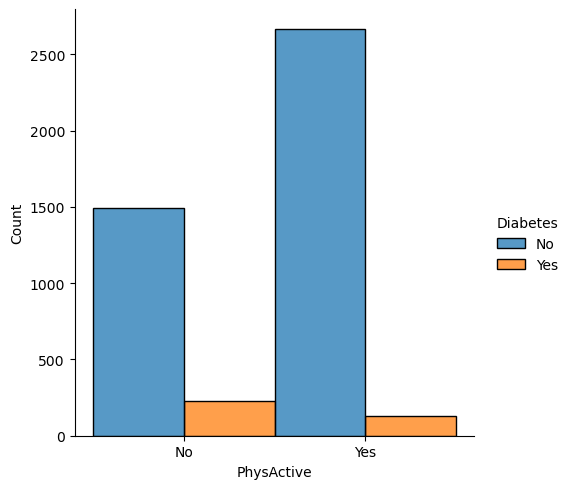

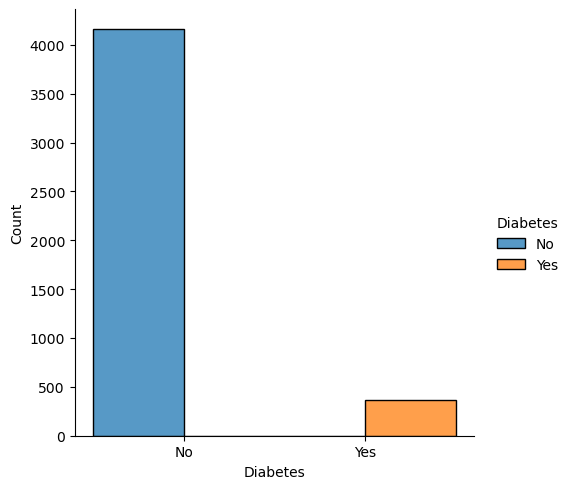

In [21]:
for i in dataset_new.columns:
    sns.displot(dataset, x=i,multiple="dodge",hue="Diabetes")
    

**Pair plot**

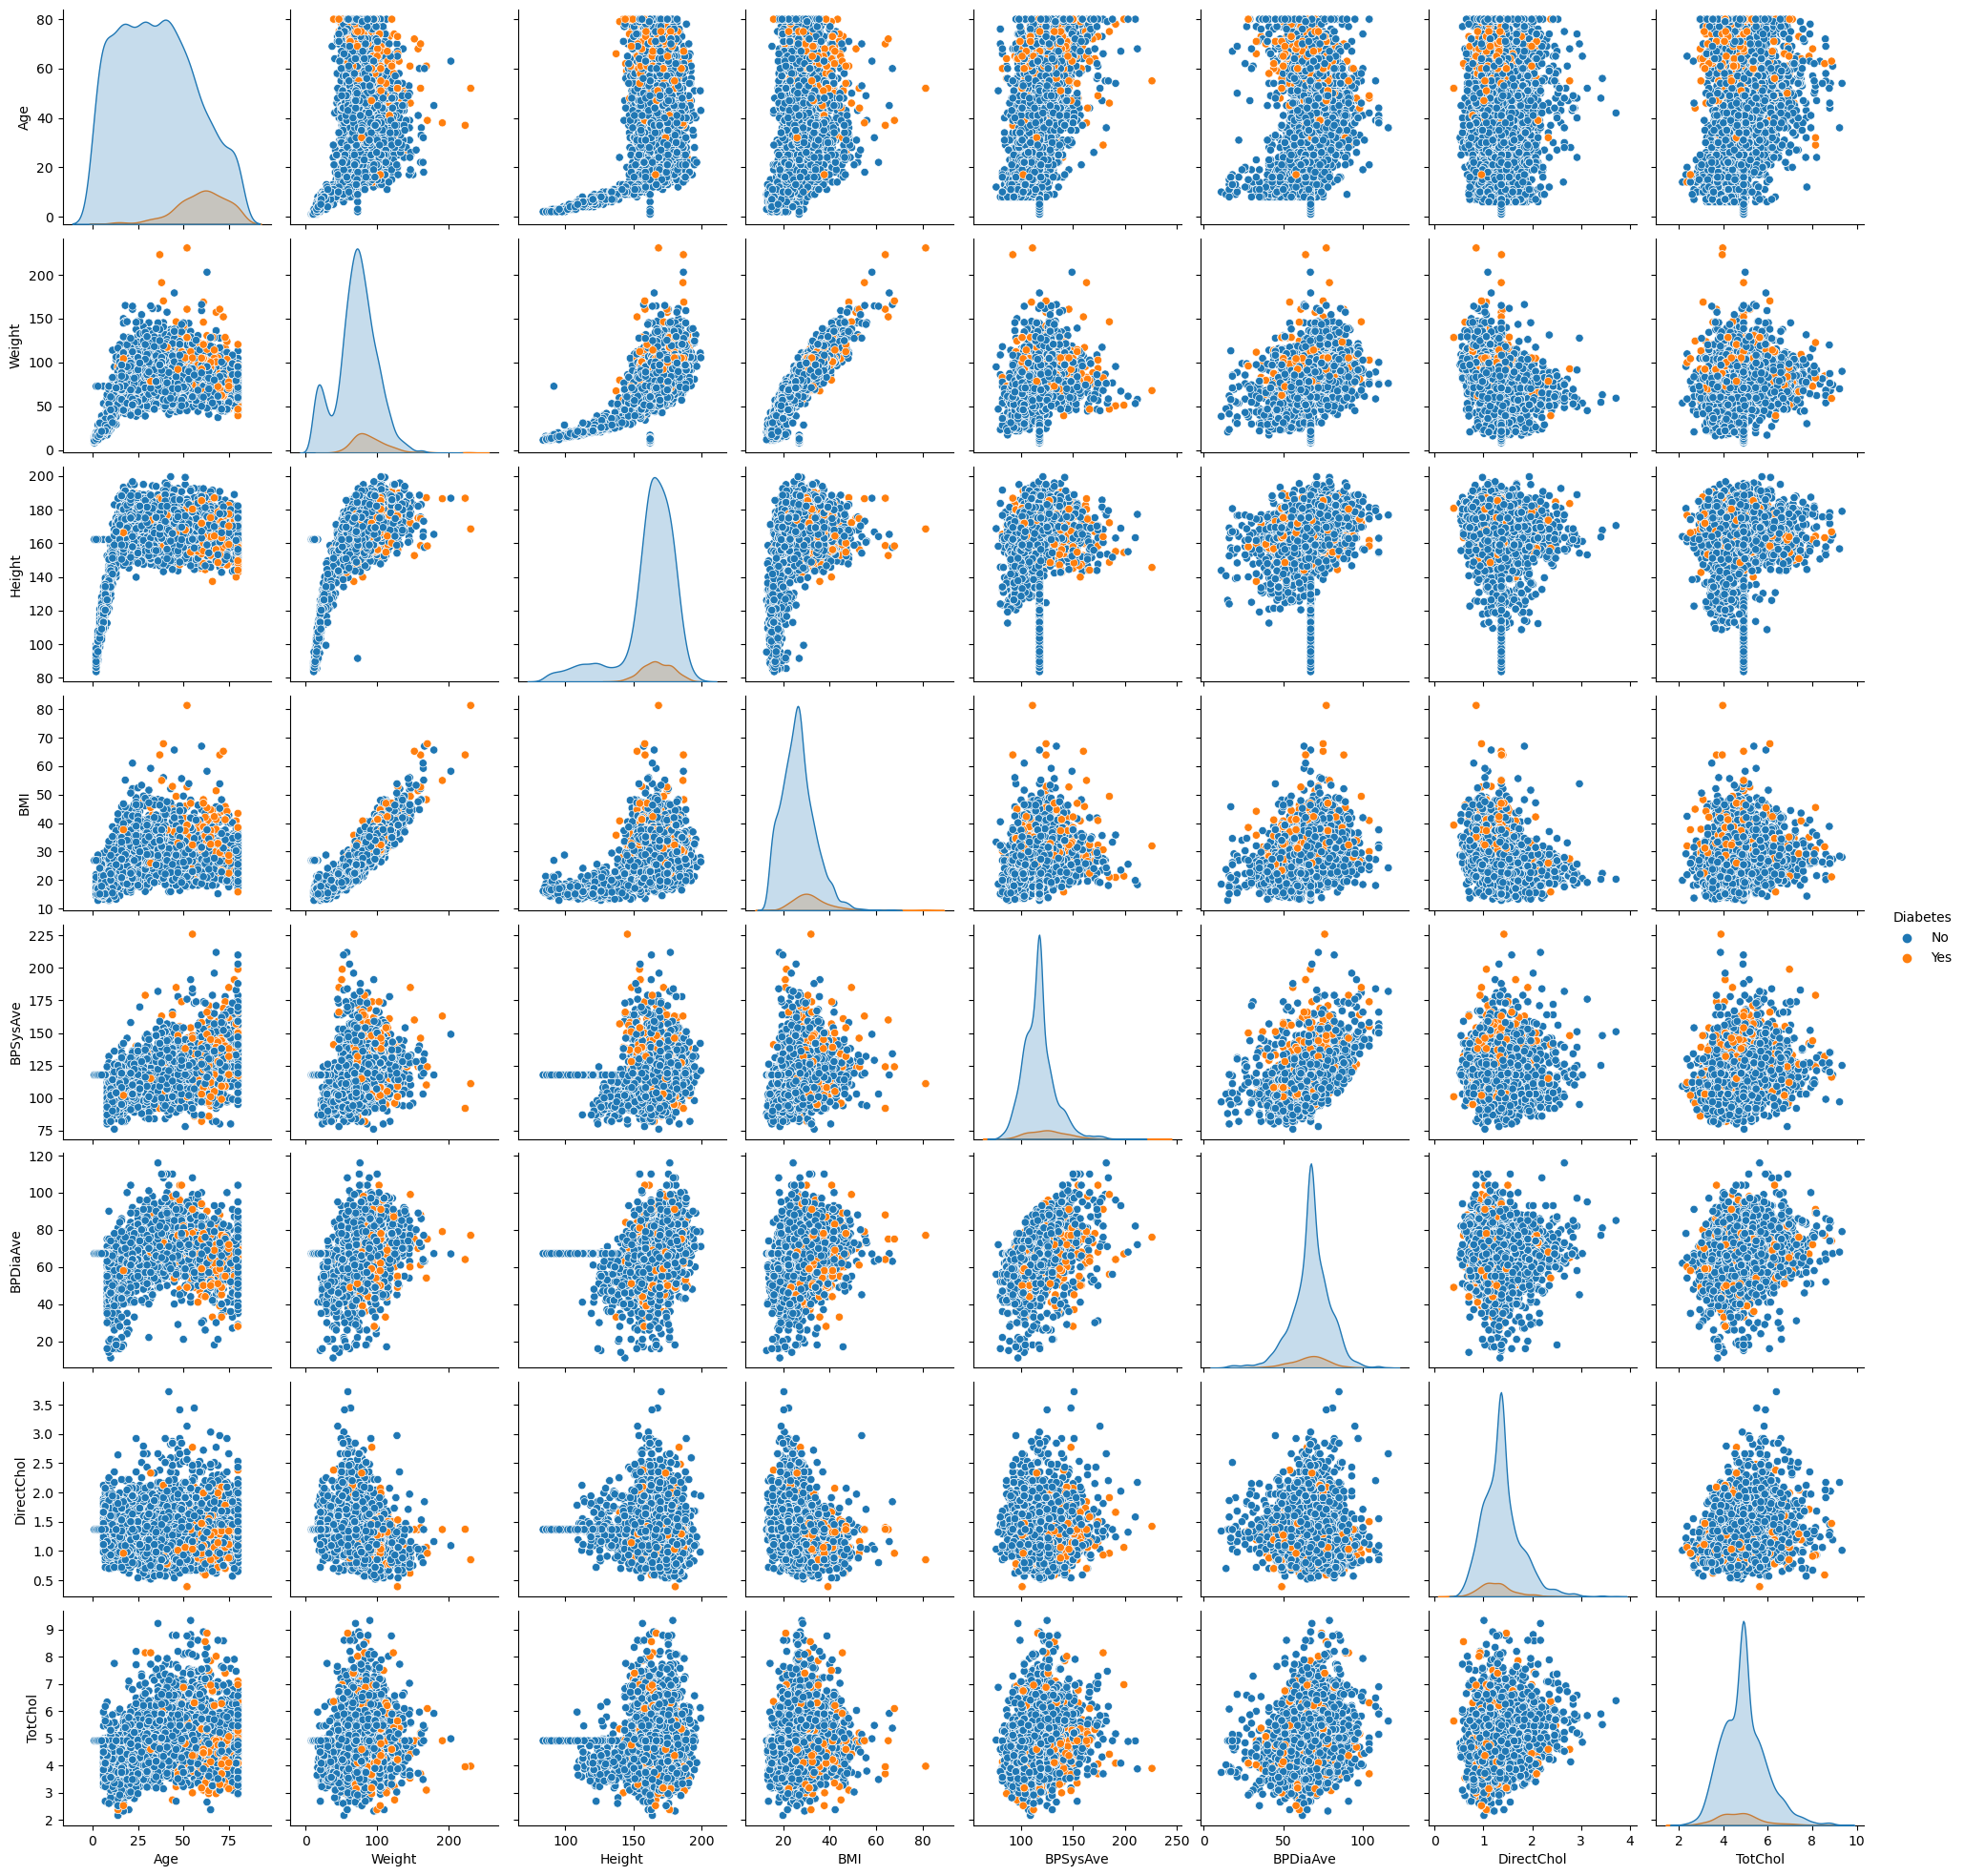

In [22]:
sns.pairplot(data = dataset, hue = 'Diabetes')
plt.show()

**Plot correlation matrix (Clustermap)**

In [23]:

import matplotlib.pyplot as plt
import numpy as np
 

#Converting dataset_new into a panda dataframe
df = dataset_new

corr = df.corr()

 #Displaying dataframe of correlation values
corr.style.background_gradient(cmap ='coolwarm')

# Algorithms

Here we process and standardize the data so that we can finally build different models with them.

**Dummy variable**

According to what we learned in the data mining course, in many models including logistic regression, we cannot have nominal discrete data. Dummy variables are a solution that can be effective to convert them into binary variables (by expanding the columns).



In [24]:

df3 = dataset_new.copy()
# These columns must be converted
df3 = pd.get_dummies(df3,columns = ['Gender', 'Race1','Education','MaritalStatus','Work','PhysActive','Diabetes'], drop_first = True)
print(df3.columns)
dataset_new=df3.copy()

Index(['Age', 'Weight', 'Height', 'BMI', 'BPSysAve', 'BPDiaAve', 'DirectChol',
       'TotChol', 'Gender_male', 'Race1_Hispanic', 'Race1_Mexican',
       'Race1_Other', 'Race1_White', 'Education_9 - 11th Grade',
       'Education_College Grad', 'Education_High School',
       'Education_Some College', 'MaritalStatus_LivePartner',
       'MaritalStatus_Married', 'MaritalStatus_NeverMarried',
       'MaritalStatus_Separated', 'MaritalStatus_Widowed', 'Work_NotWorking',
       'Work_Working', 'PhysActive_Yes', 'Diabetes_Yes'],
      dtype='object')


Now we see the result:

In [25]:
dataset_new.head()

Age  Weight  Height    BMI    BPSysAve  BPDiaAve  DirectChol   TotChol  \
0   34    87.4   164.7  32.22  113.000000  85.00000    1.290000  3.490000   
1   34    87.4   164.7  32.22  113.000000  85.00000    1.290000  3.490000   
2   34    87.4   164.7  32.22  113.000000  85.00000    1.290000  3.490000   
3    4    17.0   105.4  15.30  117.692347  67.17018    1.365681  4.917519   
4   49    86.7   168.4  30.57  112.000000  75.00000    1.160000  6.700000   

   Gender_male  Race1_Hispanic  ...  Education_Some College  \
0            1               0  ...                       0   
1            1               0  ...                       0   
2            1               0  ...                       0   
3            1               0  ...                       1   
4            0               0  ...                       1   

   MaritalStatus_LivePartner  MaritalStatus_Married  \
0                          0                      1   
1                          0                      1   
2                          0                      1   
3                          0                      1   
4                          1                      0   

   MaritalStatus_NeverMarried  MaritalStatus_Separated  MaritalStatus_Widowed  \
0                           0                        0                      0   
1                           0                        0                      0   
2                           0                        0                      0   
3                           0                        0                      0   
4                           0                        0                      0   

   Work_NotWorking  Work_Working  PhysActive_Yes  Diabetes_Yes  
0                1             0               0             0  
1                1             0               0             0  
2                1             0               0             0  
3                0             1               1             0  
4                1             0               0             0  

[5 rows x 26 columns]

**Preprocessing & Data Spliting**

This is one of the most important parts of our project. We must select the columns that we want to use as X and Y in the models. Then, according to the standards, 25% of the rows should randomly contain our test data, and the rest will be used for learning.

In [26]:
# Selecting X & Y
X = dataset_new.iloc[:, :-1].values
Y = dataset_new.iloc[:, -1].values


In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.25, random_state = 0)


Most machine learning algorithms use Euclidean distance for their estimates. For this reason, if some samples have too much or too little value, the accuracy of the modeling will decrease. Data scaling is used to solve this problem.


In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

This step was the last step of data preprocessing. Now we can inject our data into machine learning algorithms.

In [29]:
# Checking dimensions
print("XTrain shape:", XTrain.shape)
print("XTest shape:", XTest.shape)
print("YTrain shape:", YTrain.shape)
print("YTest shape:", YTest.shape)

XTrain shape: (3390, 25)
XTest shape: (1130, 25)
YTrain shape: (3390,)
YTest shape: (1130,)


**Cross validator**
.
.
.
.


In [30]:
#Importing required libraries
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def Kfold_modulation(input_model):

    #Implementing cross validation
    k_list = [2,5,10]
    acc_list=[]

    for k in k_list:

        #kf = RepeatedKFold(n_splits=k, n_repeats=20, random_state=None)
        kf = KFold(n_splits=k,shuffle=False, random_state=None)
        model = input_model
        
        acc_score = []

        scores = cross_val_score(model, X, Y, scoring='accuracy', cv=kf)    
        avg_acc_score = mean(scores)
        #print(acc_score)
        #print(sum(acc_score))
        #print(n)

      #  print('Avg acc : avg_acc_score)
        acc_list.append(avg_acc_score)
    return acc_list 


In [31]:

from sklearn.model_selection import cross_val_score
def Kfold_modulation2(input_model):

    #Implementing cross validation
    k_list = [2,5,10]
    auc_list=[]

    for k in k_list:

            
            mean_score = cross_val_score(input_model, X, Y, scoring="roc_auc", cv = k).mean()

            auc_list.append(mean_score)
    
    return auc_list

We create logistic regression and random tree forest models:

**Logistic regresion**

In [32]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_acc=Kfold_modulation(logreg)
logreg_auc=Kfold_modulation2(logreg)
logreg.fit(XTrain, YTrain)
logreg_pred=logreg.predict(XTest)
print(logreg_acc)



[0.9157079646017698, 0.9188053097345132, 0.9185840707964601]


**Random forest**

In [33]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor_acc=Kfold_modulation(ranfor)
ranfor_auc=Kfold_modulation2(ranfor)
ranfor.fit(XTrain, YTrain)
ranfor_pred=ranfor.predict(XTest)
#ss=pd.DataFrame(XTrain)
#ss.head()
#print(ranfor_acc)
#print(ranfor_auc)

Decision Trees

In [51]:
# Decision Trees Algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DecTree = DecisionTreeClassifier()
DecTree_acc=Kfold_modulation(DecTree)
DecTree_auc=Kfold_modulation2(DecTree)
DecTree.fit(XTrain, YTrain)

#DecTree_auc=Kfold_modulation2(DecTree)
#print(DecTree_auc)
#text_representation = tree.export_text(DecTree)
#print(text_representation)

DecTree_pred=DecTree.predict(XTest)

'''
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(DecTree,max_depth=3 ,  filled=True)
tree.plot_tree(DecTree, fontsize=12,max_depth=4, ax=plt.subplots(figsize=(10,10)) )
'''

'\nfig = plt.figure(figsize=(250,200))\n_ = tree.plot_tree(DecTree,max_depth=3 ,  filled=True)\ntree.plot_tree(DecTree, fontsize=12,max_depth=4, ax=plt.subplots(figsize=(10,10)) )\n'

AdaBoost:

In [35]:
#  AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost_acc=Kfold_modulation(AdaBoost)
AdaBoost_auc=Kfold_modulation2(AdaBoost)
AdaBoost.fit(XTrain, YTrain)
AdaBoost_pred=AdaBoost.predict(XTest)

Naive Bayes:

In [36]:
# Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb_acc=Kfold_modulation(nb)
nb_auc=Kfold_modulation2(nb)
nb.fit(XTrain, YTrain)
nb_pred=nb.predict(XTest)

Calculating ACC for decision tree algorithm and drawing ROC diagram for it:

Accuracy for DecTree : 0.9309734513274336


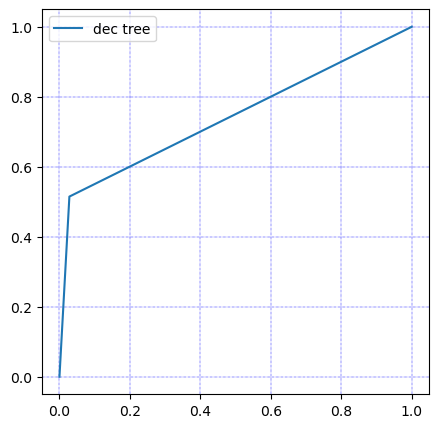

In [47]:
from sklearn import metrics
models=['DecTree']
accuracy=[DecTree_pred]

for i,j in zip(models,accuracy):
  print("Accuracy for {} : {}".format(i,metrics.accuracy_score(YTest,j)))

r_probs=[0 for i in range(len(YTest))]
y1_pred_prob=DecTree.predict_proba(XTest)[::,1]
y2_pred_prob=ranfor.predict_proba(XTest)[::,1]

fpr1, tpr1, _a = metrics.roc_curve(YTest,  y1_pred_prob)
fpr2,tpr2,_b= metrics.roc_curve(YTest,  y2_pred_prob)
#print(fpr1, tpr1)
#print(fpr2,tpr2)
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.plot(fpr1,tpr1,label="dec tree")
#plt.plot(fpr2,tpr2,label="ranfor")

plt.legend(loc=2)
plt.grid(color='b', ls = '-.', lw = 0.3)
plt.show()

# Show Scoring

In this section, we must evaluate how reliable our models and measure the error rate of the Predictors (by K-Folds):

In [38]:
acc_list0=[logreg_acc,ranfor_acc,DecTree_acc,AdaBoost_acc,nb_acc]
acc_list=[]
for i in acc_list0 :
    my_formatted_list = [ '%.4f' % elem for elem in i ]
    list=[]
    #for i in my_formatted_list:
        #list.append(int(float(i)*100))
    acc_list.append(my_formatted_list)
'''
print("Logistic Regression: " + str(acc_list[0]))
print("Random Forest: " + str(acc_list[1]))
print("DecisionTree: " + str(acc_list[2]))
print("AdaBoost: " + str(acc_list[3]))
print("Naive Bayes: " + str(acc_list[4]))
'''


auc_list0=[logreg_auc,ranfor_auc,DecTree_auc,AdaBoost_auc,nb_auc]
auc_list=[]
for i in auc_list0 :
    my_formatted_list = [ '%.4f' % elem for elem in i ]
    list=[]
    #for i in my_formatted_list:
        #list.append(int(float(i)*100))
    auc_list.append(my_formatted_list)



Creating ACC and AUC values for various algorithms:

In [39]:
bar=pd.DataFrame([acc_list[0],acc_list[1],acc_list[2],acc_list[3],acc_list[4]])
bar['algo'] = ['LR','RF','DT','AB','NB']
#bar.insert()=['logreg_acc','ranfor_acc','DecTree_acc','AdaBoost_acc','nb_acc']
bar.columns=['K2' , 'K5' , 'K10','Algorithm']

bar['K2']=bar['K2'].astype('float64')*100
bar['K5']=bar['K5'].astype('float64')*100
bar['K10']=bar['K10'].astype('float64')*100

print('ACC','\n',bar,'\n')



barauc=pd.DataFrame([auc_list[0],auc_list[1],auc_list[2],auc_list[3],auc_list[4]])
barauc['algo'] = ['LR','RF','DT','AB','NB']
#barauc.insert()=['logreg_auc','ranfor_auc','DecTree_auc','AdaBoost_auc','nb_auc']
barauc.columns=['K2' , 'K5' , 'K10','Algorithm']
barauc['K2']=barauc['K2'].astype('float64')*100
barauc['K5']=barauc['K5'].astype('float64')*100
barauc['K10']=barauc['K10'].astype('float64')*100
print('\n','AUC','\n',barauc)

ACC 
       K2     K5    K10 Algorithm
0  91.57  91.88  91.86        LR
1  91.57  91.86  92.04        RF
2  88.27  86.77  87.48        DT
3  90.62  90.84  91.06        AB
4  83.85  83.14  83.21        NB 


 AUC 
       K2     K5    K10 Algorithm
0  84.92  85.44  85.58        LR
1  84.41  85.73  84.09        RF
2  60.74  61.65  58.81        DT
3  80.93  80.72  82.30        AB
4  77.91  80.78  80.41        NB


Drawing ACC and AUC graphs for different algorithms:

<Axes: title={'center': 'AUC'}, xlabel='Algorithm'>

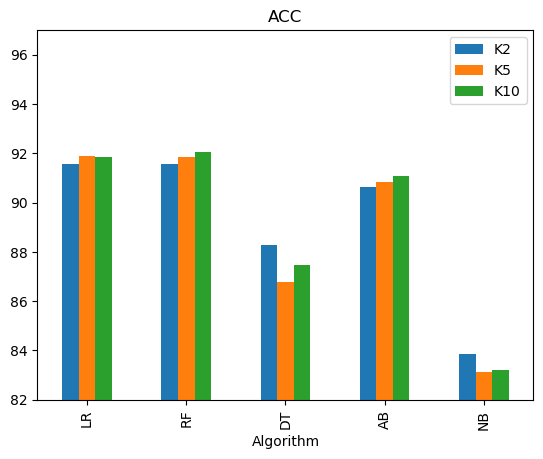

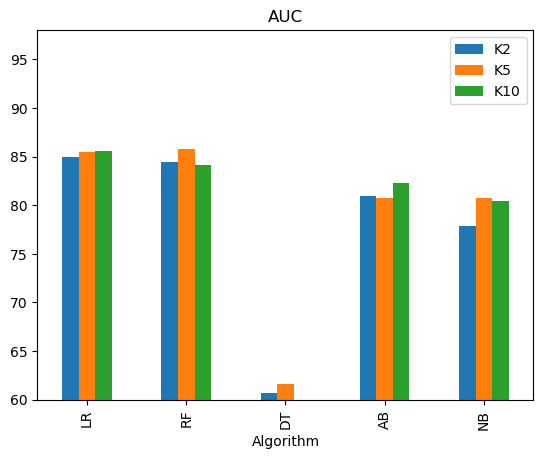

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
  
# create data

# view data

bar['K2'] = bar['K2'].astype('float64') 
bar['K5'] = bar['K5'].astype('float64') 
bar['K10'] = bar['K10'].astype('float64') 
# plot grouped bar chart
bar.plot(x='Algorithm',
        kind='bar',
        stacked=False,
        ylim=[82, 97],
        title='ACC')

barauc['K2'] = barauc['K2'].astype('float64') 
barauc['K5'] = barauc['K5'].astype('float64') 
barauc['K10'] = barauc['K10'].astype('float64') 
# plot grouped bar chart
barauc.plot(x='Algorithm',
        kind='bar',
        stacked=False,
        ylim=[60, 98],
        title='AUC')

Drawing ROC diagram for different folds:

10
0.7775579842737749


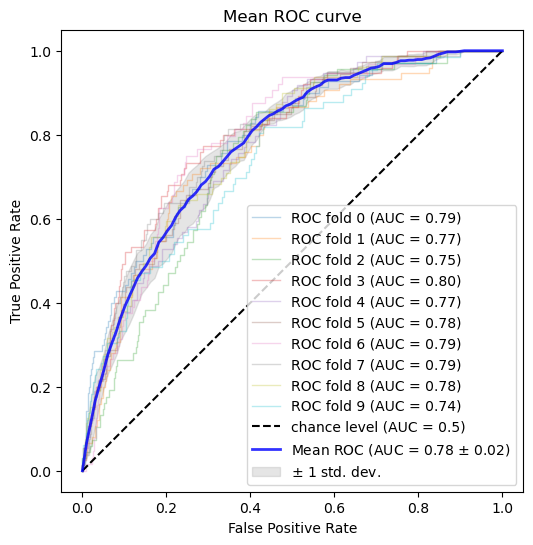

<class 'numpy.float64'>
0.7758122241686485


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Qavam\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Qavam\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Qavam\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Qavam\anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

In [57]:
import numpy as np

XR, YR = X, Y
XR, YR = XR[YR != 2], YR[YR != 2]
n_samples, n_features = XR.shape



random_state = np.random.RandomState(0)
XR = np.concatenate([XR, random_state.randn(n_samples, 200 * n_features)], axis=1)



import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

#cv = StratifiedKFold(n_splits=5)
cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=None)
classifier = logreg

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(XR, YR)):
    classifier.fit(XR[train], YR[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        XR[test],
        YR[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
print(len(aucs))
#print(tprs)
print(aucs[5])
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

std_auc = np.std(aucs)

ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)
ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()


#print(aucs[0].mean())
print(type(aucs[0]))
aucs2=[]
#aucs1 = [item for sublist.item() in aucs for item in sublist.item()]
for i in aucs:
    for u in aucs:
        aucs2.append(u.item())

def Average(lst):
    return sum(lst) / len(lst)
  
# Driver Code

average1 = Average(aucs2)        
print(average1)



We draw the correlation matrix for better understanding:

[[1025    4]
 [  66   35]]


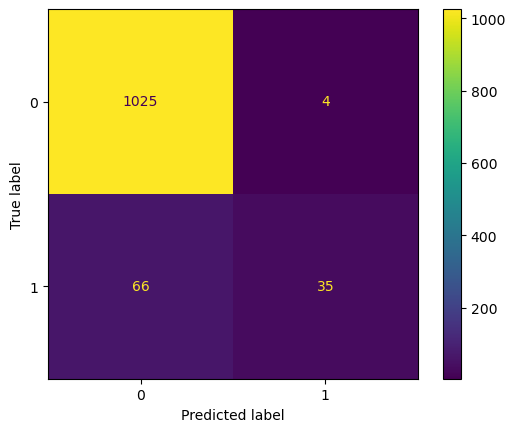

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#In the models, we put test data to make predictions for us.
    
YP_ranfor = ranfor.predict(XTest)

cm = confusion_matrix(YTest, YP_ranfor, labels=None)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



Classification report (for main classification metrics) :

In [45]:
from sklearn.metrics import classification_report
print(classification_report(YTest, YP_ranfor))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1029
           1       0.90      0.35      0.50       101

    accuracy                           0.94      1130
   macro avg       0.92      0.67      0.73      1130
weighted avg       0.94      0.94      0.93      1130

